<a href="https://colab.research.google.com/github/martinmaturana777/AED-Apuntes/blob/main/Pauta_Auxiliar_8_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aed-utilities
import aed_utilities as aed
import numpy as np

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.2 MB/s eta 0:00:00
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4541 sha256=2627248a88e3d7e9b576fee358d113eef81fbc88256794758a5e5c25fe26dc95
  Stored in directory: /root/.cache/pip/wheels/e2/87/f8/223d5e6792e7b0fc909ef2cdb96ceb6a5336f428bc8eea7ffa
Successfully built aed-utilities


# Pauta Auxiliar 8: Splay Trees, Árboles Digitales

**Auxiliares: Valentina Alarcón Yañez, Antonia G. Calvo, Cristián Llull Torres, Raimundo Lorca Correa, Samuel Chávez Fierro<br>
Profesores: Nelson Baloian, Iván Sipirán, Patricio Poblete<br>
Curso: CC3001 Algoritmos y Estructuras de Datos**



# Pregunta 1: Splay Trees

Un splay tree (árbol biselado) es otro tipo de árbol de búsqueda binaria autobalanceante, cuya propiedad más interesante es que los últimos nodos buscados e insertados están más cerca de la raíz que los nodos más antiguos. En particular, el último nodo insertado/accedido x va a ser la nueva raíz del árbol. Esto se logra mediante una operación llamada splaying sobre $x$.

Si una llave buscada $x$ no se encuentra en el árbol, se realiza la operación $s p l a y(x')$, con $x'$ el último nodo visitado.

Esta estrategia garantiza que cualquier secuencia de $m$ operaciones en un árbol que llega a tener $n$ elementos, partiendo de un árbol vacío, toma tiempo $O(m log n)$. Es importante notar que no garantiza que alguna secuencia en particular no va a tomar $O(n)$, sino que el costo acumulado dividido por el número de operaciones da un promedio de $O(log n)$ por operación. Se dice que una estructura de este tipo es eficiente en el sentido amortizado. Los tres casos de la operación de *splaying* se encuentran en el anexo.

a) Inserte en un Splay Tree vacío la siguiente secuencia: 1, 2, 3, 4, 5, 6, 7, 8.

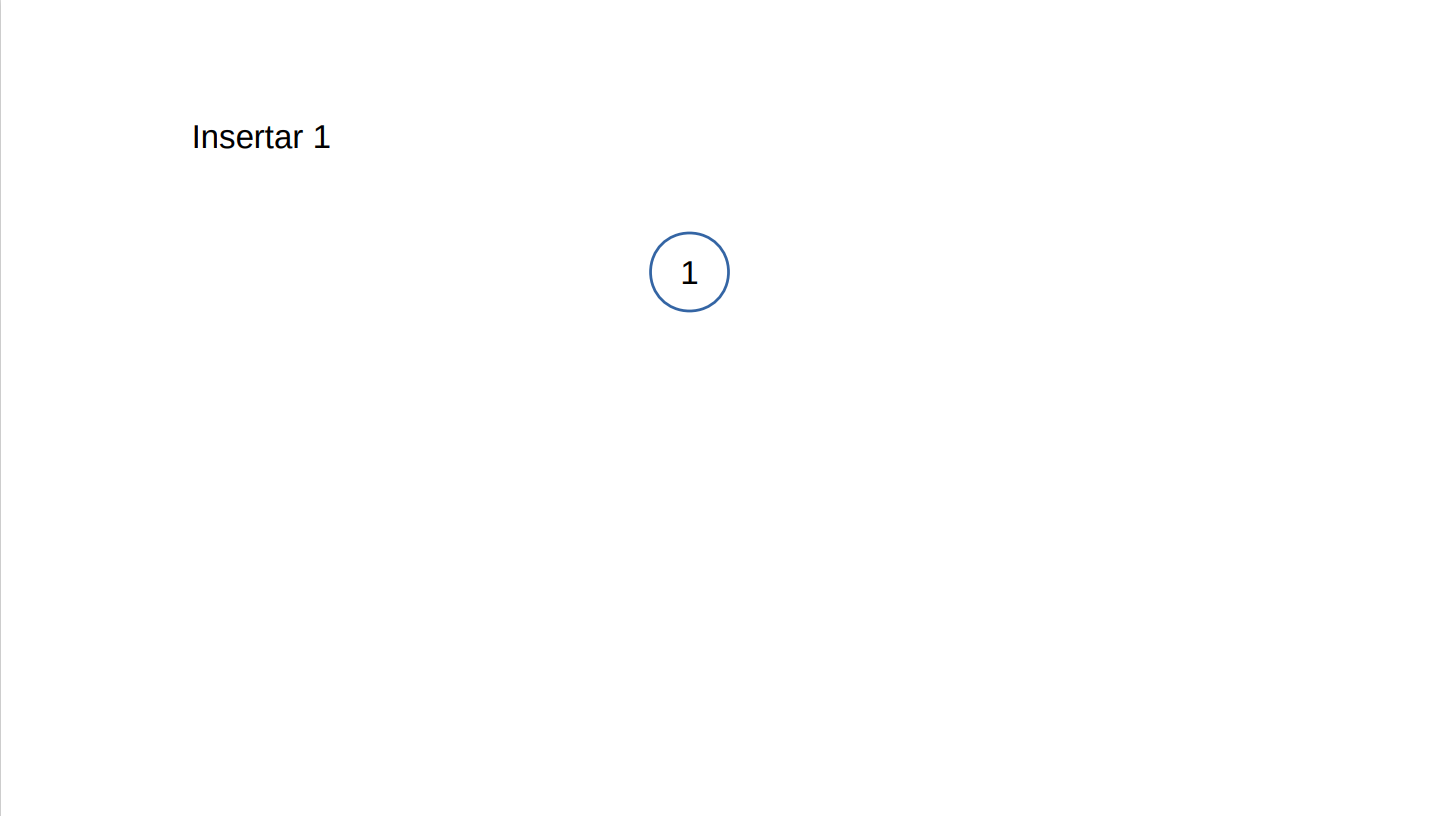

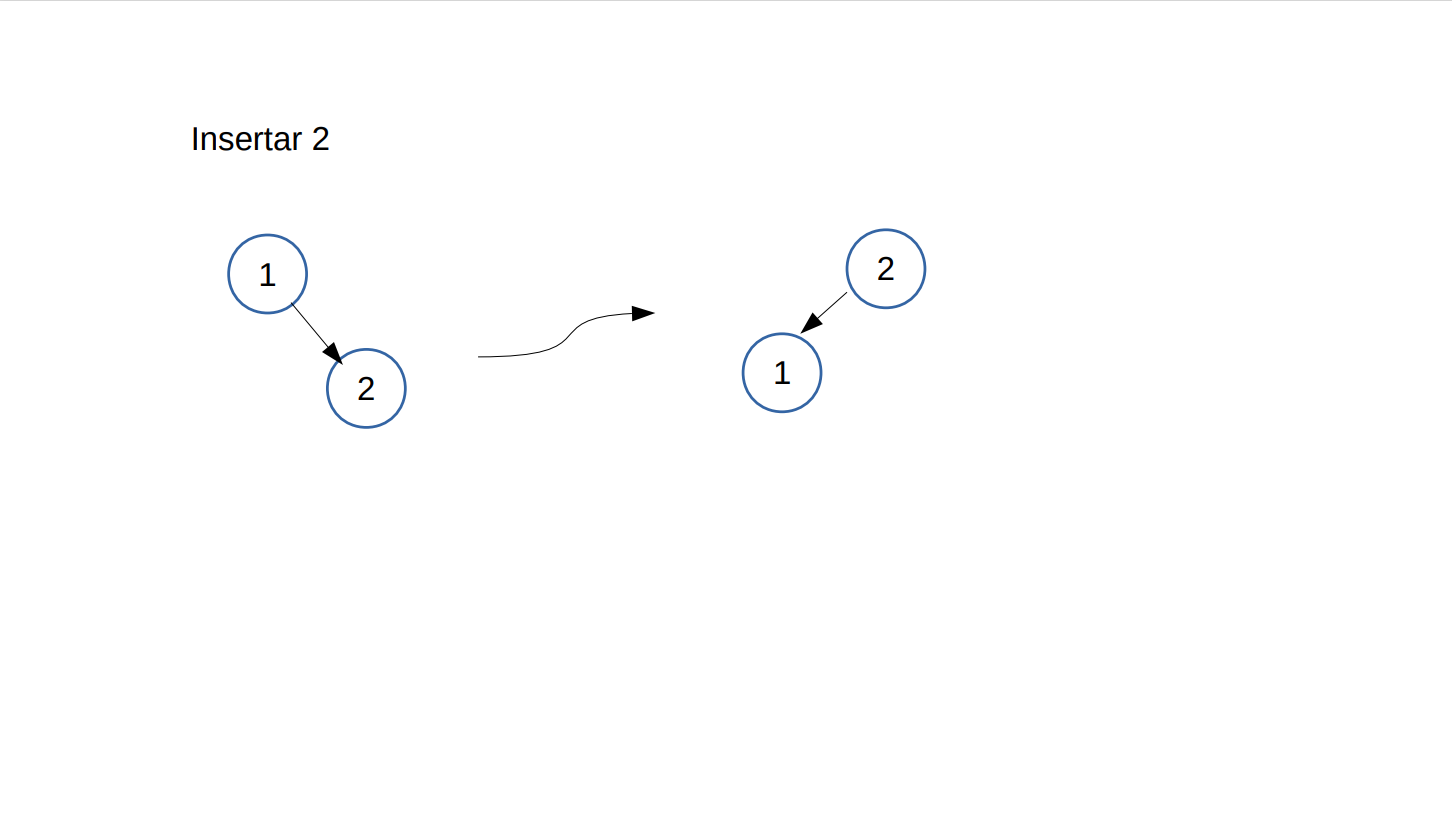

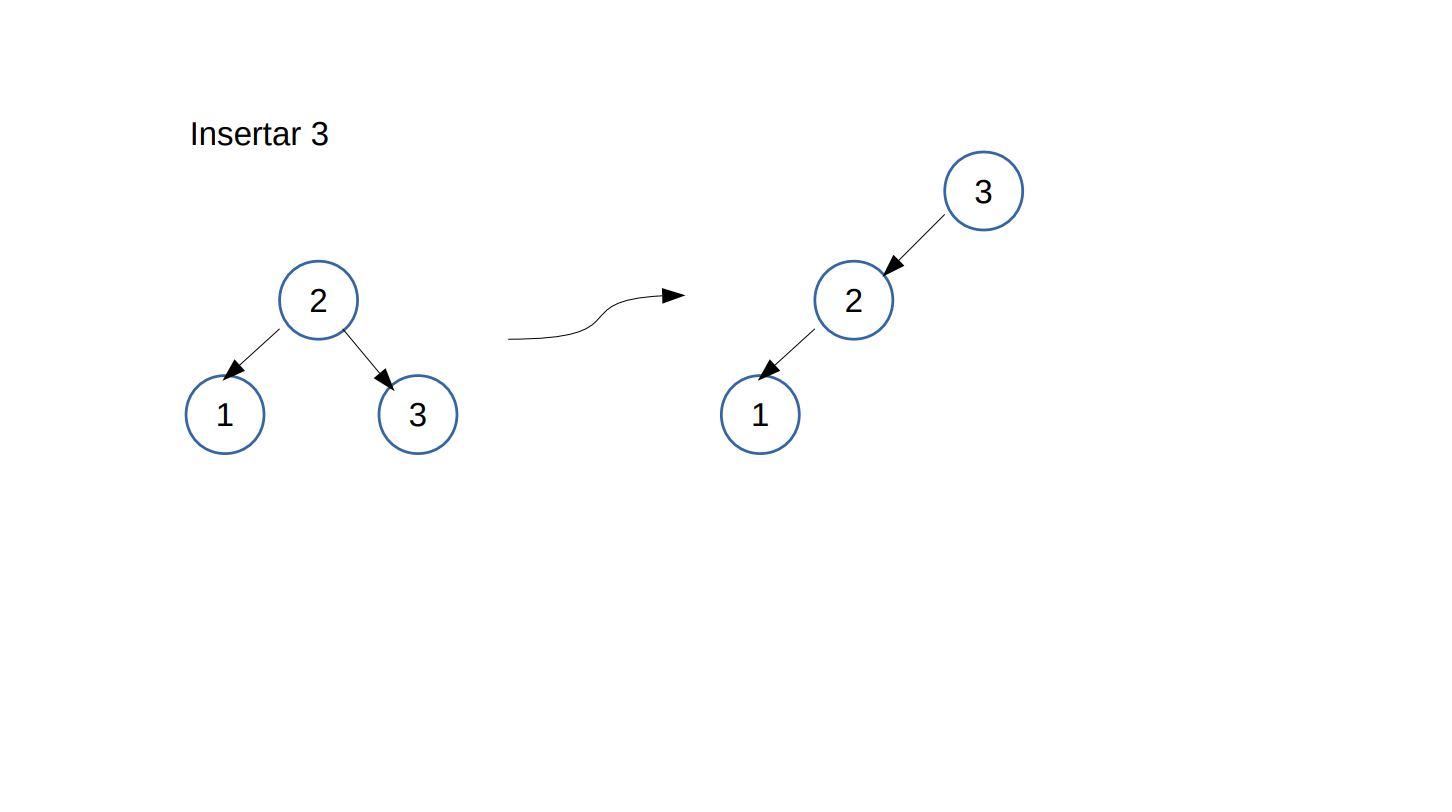

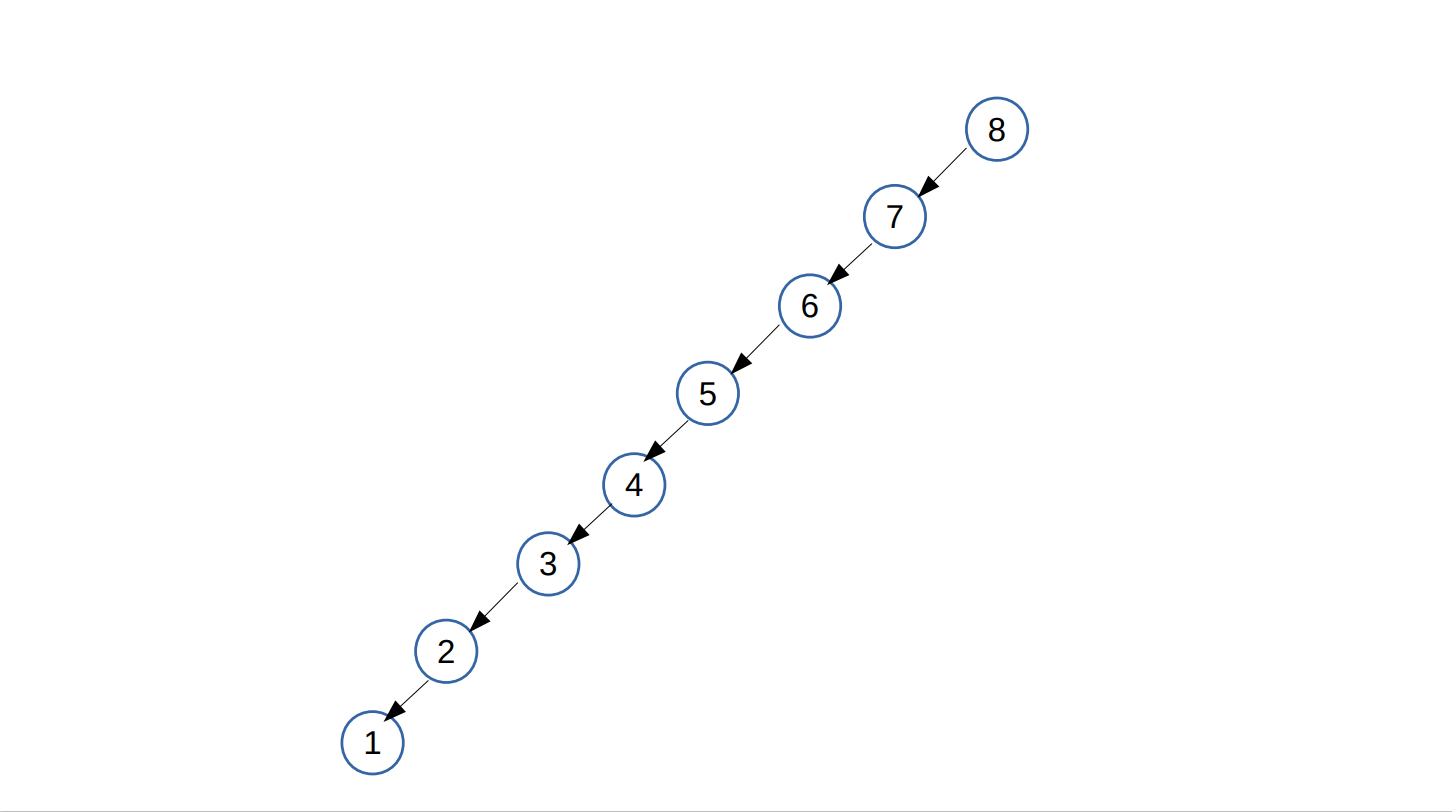

b) Acceda al nodo con valor 1, realizando el splaying correspondiente. Comente acerca de la complejidad de búsqueda en este caso en particular.

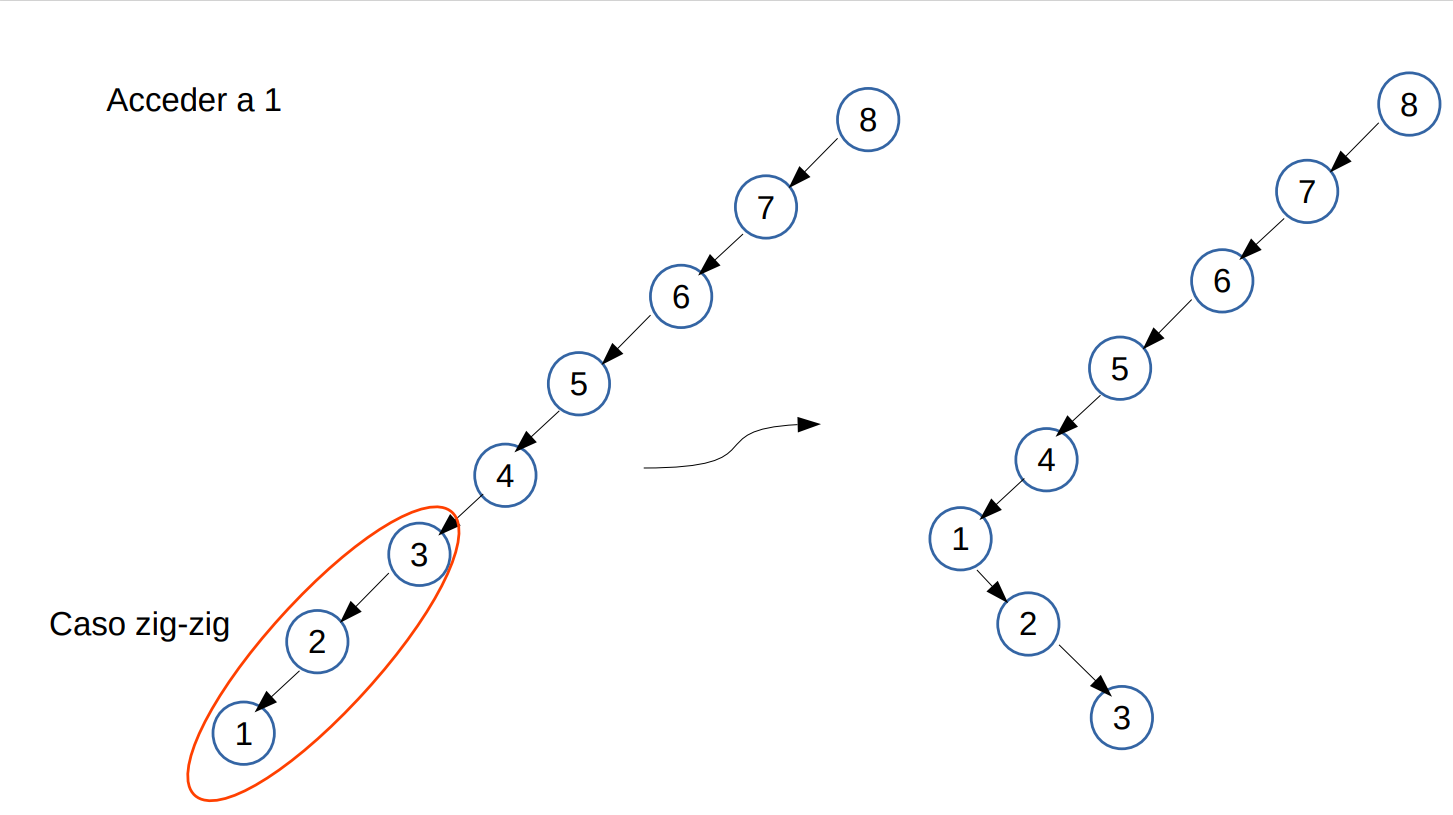

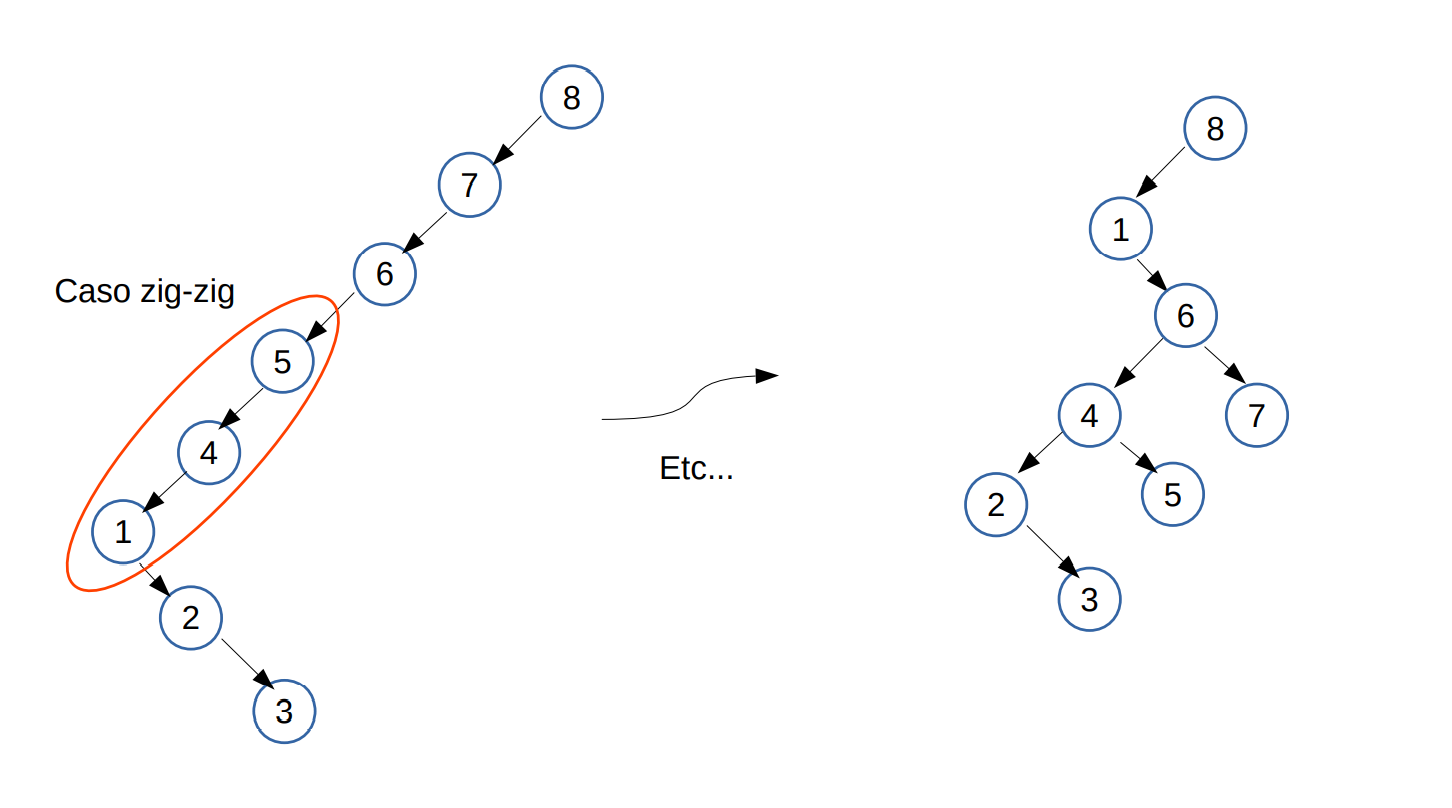

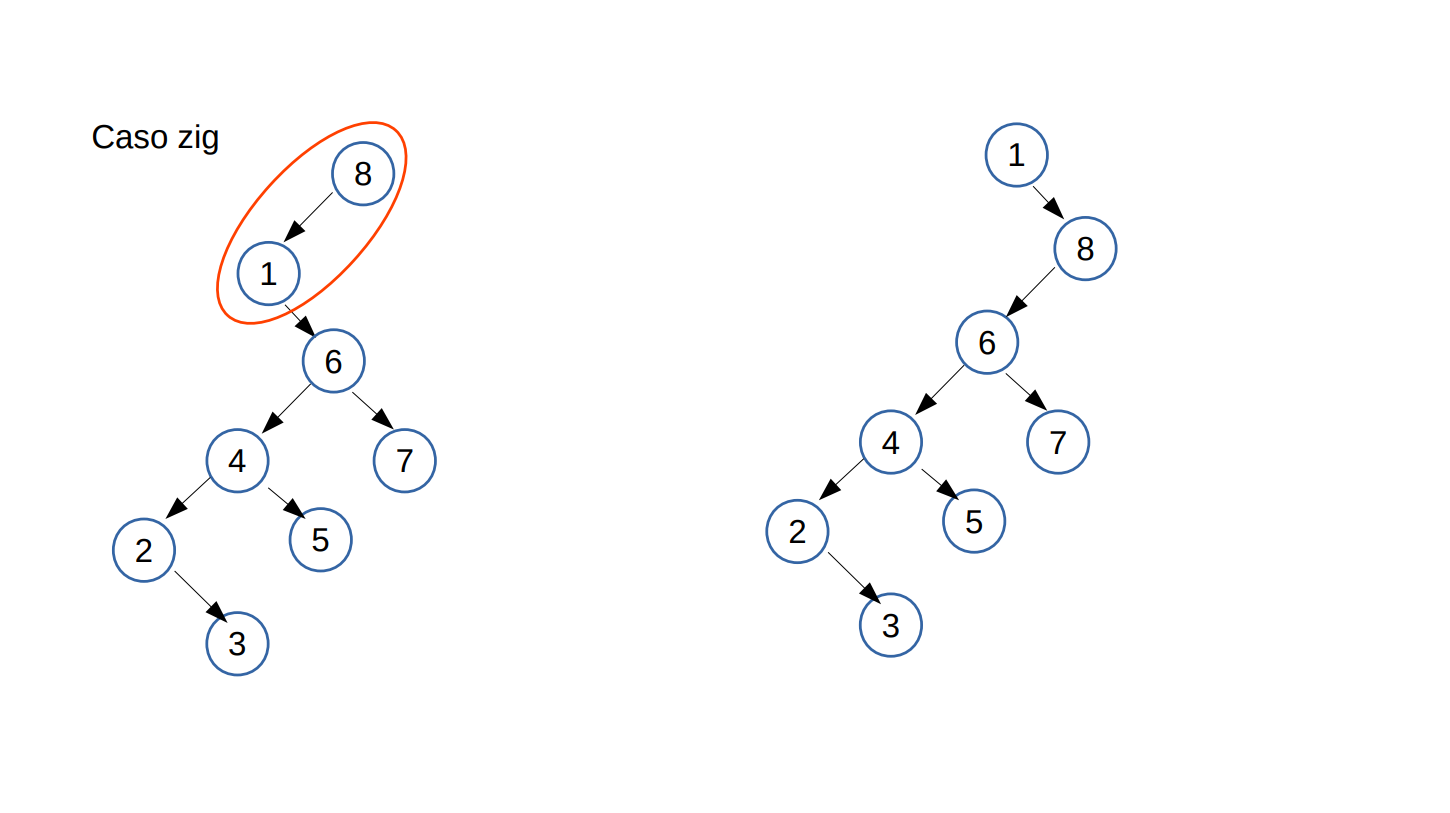

c) Practique accediendo a los nodos con valor: 4, 5. Termine insertando el 9.

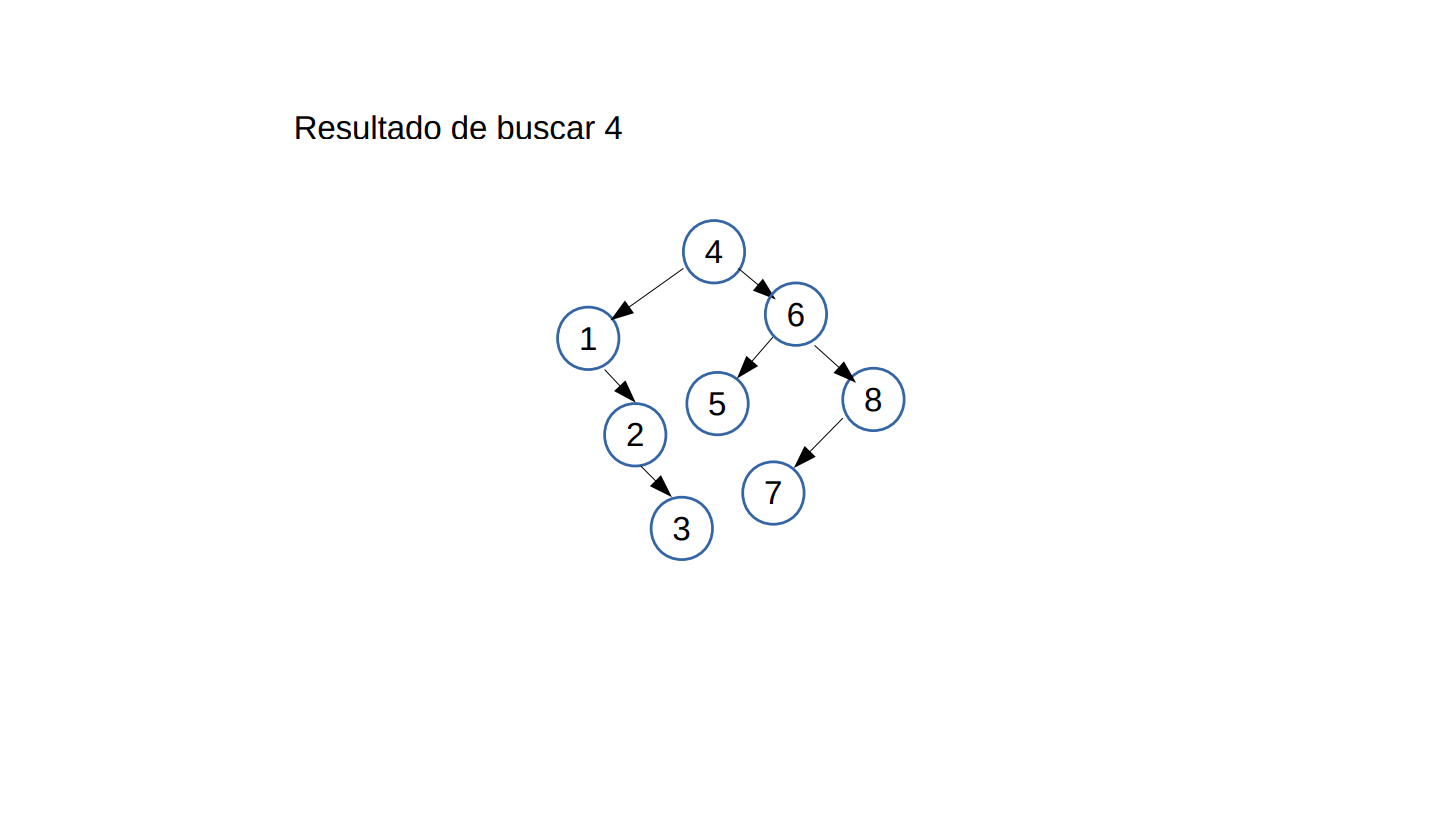

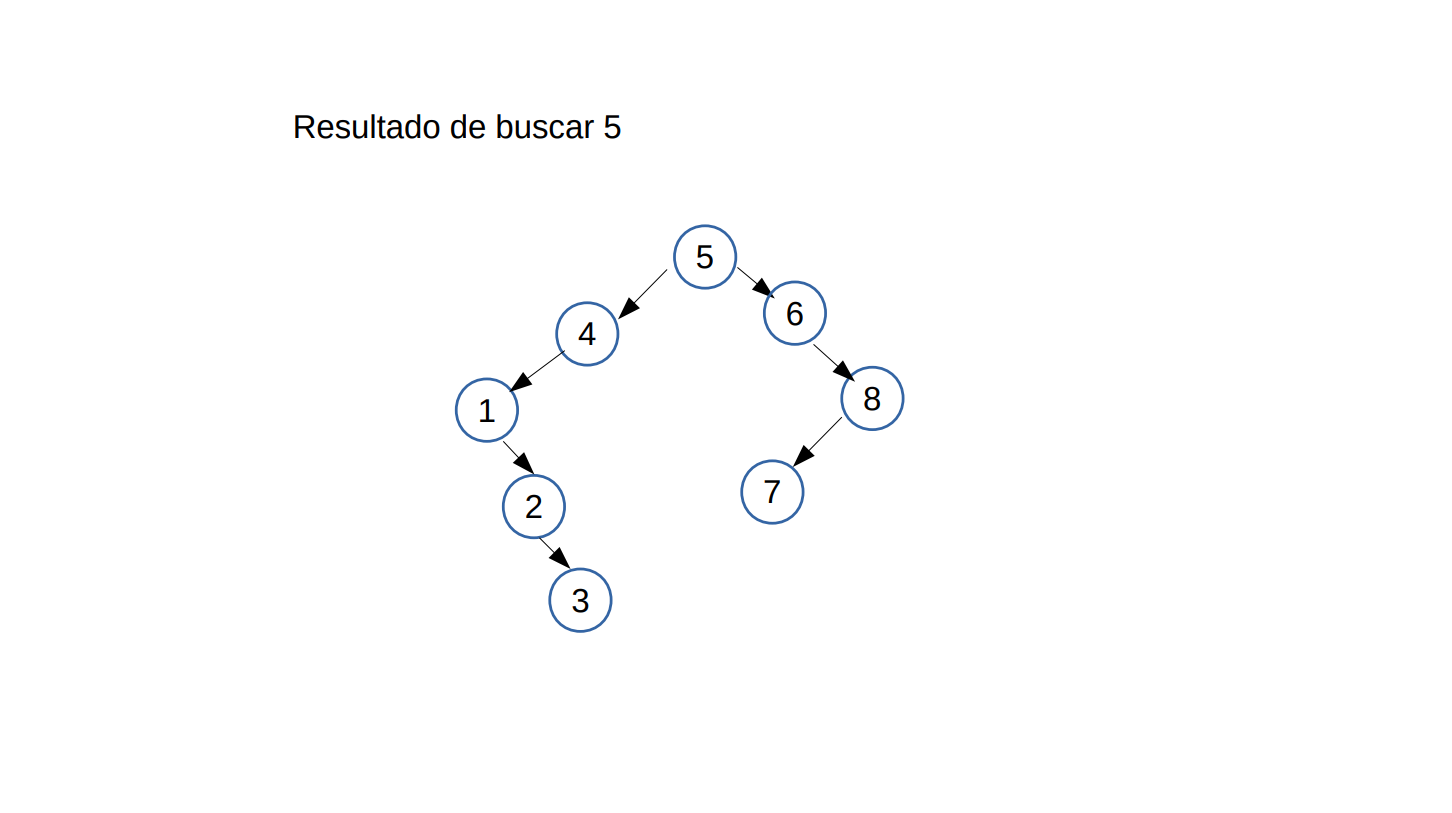

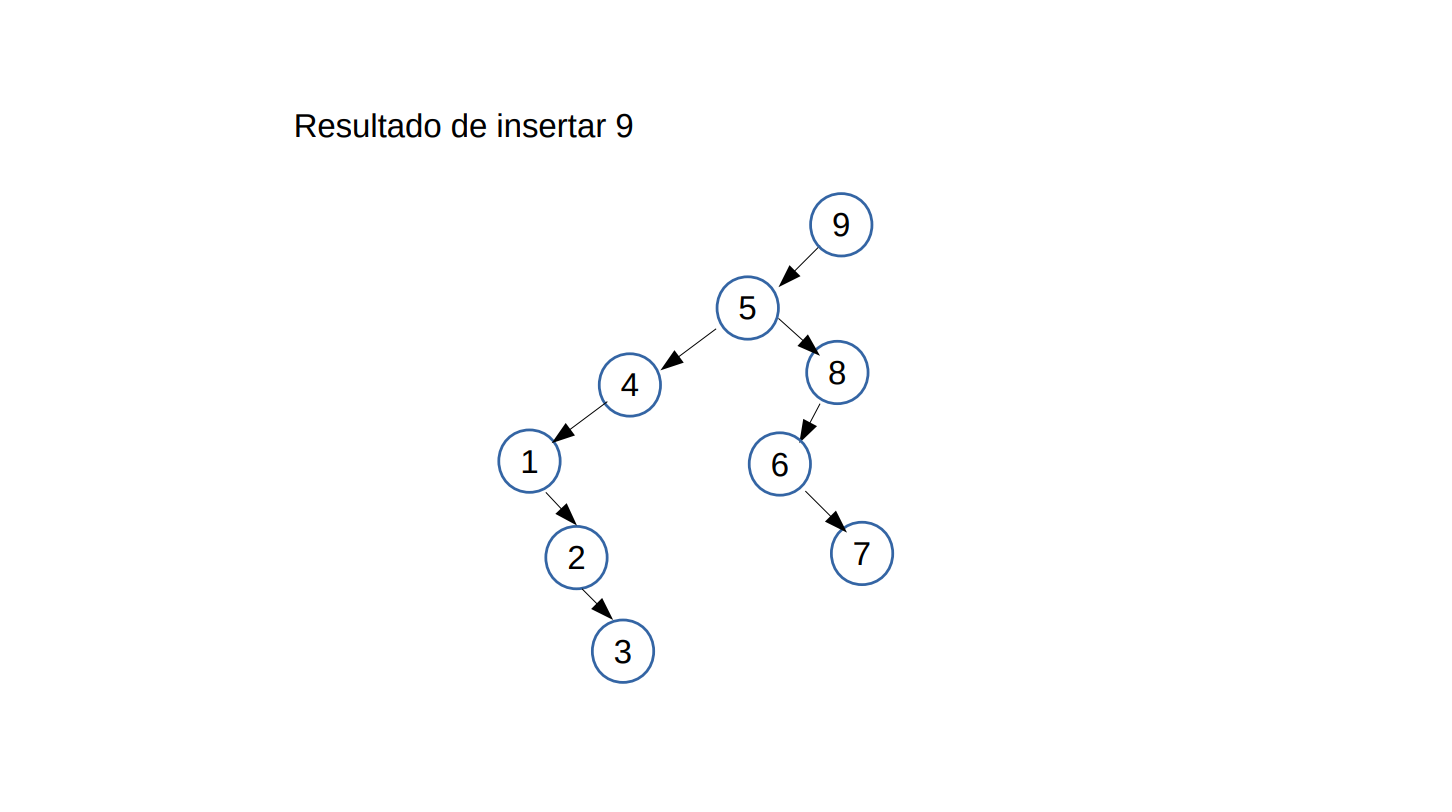

# Pregunta 2: Inserción y Eliminación en Árboles 2-3

Considere las siguientes secuencias de inserciones y eliminaciones, donde un + significa una inserción y un - una eliminación. Muestre, en un diagrama, el estado del árbol luego de cada operación para un árbol 2-3.

+ +1 +2 +3 +4
+ +1 +2 +3 -2 +4 +5 -1 +6
+ +1 +3 +2 +6 +5 +4 -1 -2
+ +25 +10 +32 +27 +74 +48
+ +25 +10 +32 +27 +74 -27

Para ver las visualizaciones de las inserciones y eliminaciones de los árboles 2-3 las pueden ver en el siguiente link con un grado máximo de 3.

+ https://www.cs.usfca.edu/~galles/visualization/BTree.html

# Pregunta 3: Árboles de Búsqueda Digital

Los árboles de búsqueda digital (ABD) son un híbrido entre los ABBs y los tries.
Las llaves se almacenan en los nodos internos, al igual que en un ABB, pero la ramificación se hace según el diccionario que se este utilizando. La búsqueda se realiza desde la raíz, eligiendo la $i$-ésima arista a recorrer según $i$-ésimo carácter del valor que se desea buscar.

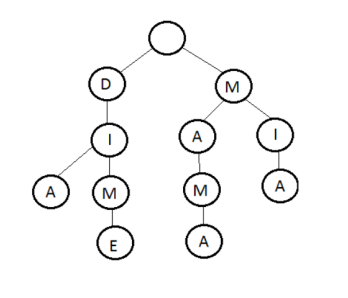

+ Inserte en un ABD vacío las palabras PANADERÍA, PAN, PANADERO, PANCITO, PALA, PALABRERÍA, PALABRA. ¿Cuál es el prefijo más largo que se repite?

+ Programe una función buscar prefijo que reciba un nodo a un ABD y un string prefijo. La función debe imprimir todas las palabras del ABD que comiencen con dicho prefijo.

In [ ]:
import numpy as np
#Definición de nodo
class NodoABD:
  def __init__(self, alphabetSize, info, iskey):
      self.info = info
      self.children = np.empty(alphabetSize, dtype=object)
      self.children[:] = None
      self.iskey = iskey # Valor booleano para indicar que es una palabra

class ABD:
  # Para este caso usaremos un Trie que pueda contener
  # las letras del alfabeto
  # Obs: En el apunte aparece un Trie que sólo puede contener 0 y 1
  def __init__(self):
    self.root = NodoABD(26, None, False)

  # Definimos la función insertar para poder
  # armar el Trie
  def insert(self, element):
    print("inserting:",element)
    # Se define la siguiente función para insertar dentro de los Nodos
    def internal_insert(node, element, level, path):
      # Se obtiene el indice de la letra
      index = ord(element[level]) - ord('A') #Esto nos da un int; 0 para A y 25 para Z
      # Caso si terminamos de recorrer toda la palabra
      if index < 0: # Si la palabra ya se encuentra como un prefijo
        node.info = element
        node.iskey = True
        return
      # Se actualiza el camino
      path += element[level] #Como element es un string el camino es un char

      # Si la letra no se encuentra dentro de los Nodos
      if node.children[index] is None:
        # Se inserta la palabra
        node.children[index] = NodoABD(26, element, iskey=True) # Se crea el nodo con 26 indices (tamaño del alfabeto)
        print("element:", element, " path: ", path)
      # Si la letra se encuentra dentro de los Nodos
      else:
        if node.children[index].info is not None:
          # Si la palabra ya se encontraba dentro del Trie
          if node.children[index].info == element:
            print("element:", element, " path: ", path)
            return # No se hace ningún cambio
          # Si no se encuentra insertada
          # Se borra el elemento actual del nodo, y se reinserta el elemento anterior en el nodo
          other_element = node.children[index].info
          node.children[index].info = None
          node.children[index].iskey = False
          internal_insert(node.children[index], other_element, level + 1, path)
        # Ahora se inserta el elemento original
        internal_insert(node.children[index], element, level + 1, path)

    # Fin de internal_insert
    # LLamamos a internal_insert con nivel 0 (indice de la palabra a revisar)
    # y agregamos el caracter $ para indicar que hay una palabra
    internal_insert(self.root, element+'$', 0, '')

  # Función que indica si una palabra se encuentra o no en el Trie
  def search(self, element):
    def internal_search(node, element, level, path):
      # Se obtiene el indice
      index = ord(element[level]) - ord('A') #Esto nos da un int; 0 para A y 25 para Z
      path += element[level] # Actualización del camino

      #Si nos pasamos entonces no está la palabra
      if index < 0:
        if node.info == element:
          return True, path
        else:
          return False, path
      # Si no hay nada en el Nodo[indice] no está en el árbol
      if node.children[index] is None:
        return False, path

      else:
        # Aquí tenemos que cambiar tambien, chequear si el elemento es el que buscamos o no
        if node.children[index].info is not None and node.children[index].info == element:
          return node.children[index].info == element, path
        else:
          # Se sigue buscando
          return internal_search(node.children[index], element, level + 1, path)
    return internal_search(self.root, element+'$', 0, '')

def buscar_prefijo(nodo, prefijo):
  # Función que contará todas las palabras que se encuentran en un Nodo
  def revisar_palabras(nodo):
    palabras = []
    # Si este Nodo parte como una palabra
    if nodo.iskey:
      palabras.append(nodo.info)
    # Revisa el resto de los hijos para revisar las palabras
    for child in nodo.children:
      if child is not None:
        palabras += revisar_palabras(child)
    return palabras

  # Si se terminó de recorrer el prefijo
  if prefijo == '':
    # Entregar todas las palabras que se encuentran en ese nodo
    return revisar_palabras(nodo)
  # Indice de la primera letra
  index = ord(prefijo[0]) - ord('A') #Esto nos da un int; 0 para A y 25 para Z
  # Si tiene un caracter fuera del alfabeto
  if index < 0:
        return []
  # Si la letra no se encuentra dentro de los Nodos (el prefijo no está)
  if nodo.children[index] is None:
    return []
  # Si se encuentra la letra pero aún no llegamos al final del prefijo
  # Se sigue en recursión hasta terminar todo el prefijo
  else:
    return buscar_prefijo(nodo.children[index], prefijo[1:])


In [ ]:
A = ABD()
A.insert('PANADERIA')
A.insert('PAN')
A.insert('PANADERO')
A.insert('PANCITO')
A.insert('PALA')
A.insert('PALABRERÍA')
A.insert('PALABRA')


inserting: PANADERIA
element: PANADERIA$  path:  P
inserting: PAN
element: PANADERIA$  path:  PA
element: PANADERIA$  path:  PAN
element: PANADERIA$  path:  PANA
inserting: PANADERO
element: PANADERIA$  path:  PANAD
element: PANADERIA$  path:  PANADE
element: PANADERIA$  path:  PANADER
element: PANADERIA$  path:  PANADERI
element: PANADERO$  path:  PANADERO
inserting: PANCITO
element: PANCITO$  path:  PANC
inserting: PALA
element: PALA$  path:  PAL
inserting: PALABRERÍA
element: PALA$  path:  PALA
element: PALABRERÍA$  path:  PALAB
inserting: PALABRA
element: PALABRERÍA$  path:  PALABR
element: PALABRERÍA$  path:  PALABRE
element: PALABRA$  path:  PALABRA


In [ ]:
print("Prefijo: PAN -> ",buscar_prefijo(A.root, 'PAN'))
print("Prefijo: PALA -> ",buscar_prefijo(A.root, 'PALA'))
print("Prefijo: PANA -> ",buscar_prefijo(A.root, 'PANA'))
print("Prefijo: PALABR -> ",buscar_prefijo(A.root, 'PALABR'))

Prefijo: PAN ->  ['PAN$', 'PANADERIA$', 'PANADERO$', 'PANCITO$']
Prefijo: PALA ->  ['PALA$', 'PALABRA$', 'PALABRERÍA$']
Prefijo: PANA ->  ['PANADERIA$', 'PANADERO$']
Prefijo: PALABR ->  ['PALABRA$', 'PALABRERÍA$']
